<div style="width: 100%; background-color: #222; text-align: center">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Project
</h1>
    
<h3 style="color: #ef7d22; font-weight: normal;">
    Deep and Cross NN (Keras)
</h3>

<br><br> 
</div>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

## Import & Prep Data

In [5]:
import os
import gc
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [6]:
print(tf. __version__)

2.5.0


In [7]:
df_play_train = pd.read_csv('train.csv')
df_play_test = pd.read_csv('test.csv')
df_psuedolabels = pd.read_csv('tps12-pseudolabels_v2.csv')

df_play_train = pd.concat([df_play_train, df_psuedolabels], axis = 0)
df_play_train.reset_index(drop = True)

df_play_train.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [8]:
df_play_train['Cover_Type'].nunique()

7

In [9]:
df_play_test.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,4.500000e+06,2969.602410,152.231636,14.923460,264.368149,51.480362,1713.507869,211.659709,221.476154,139.861454,...,0.029638,0.043415,0.040606,0.012155,0.015766,0.010695,0.012063,0.043393,0.039841,0.032778
std,2.886753e+05,342.676046,111.629725,8.457005,227.971753,68.520188,1374.922218,31.280435,21.951950,45.398002,...,0.169587,0.203790,0.197376,0.109578,0.124569,0.102862,0.109167,0.203740,0.195586,0.178055
min,4.000000e+06,1782.000000,-33.000000,-3.000000,-136.000000,-329.000000,-264.000000,1.000000,53.000000,-51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000e+06,2725.000000,59.000000,9.000000,102.000000,3.000000,751.000000,197.000000,210.000000,114.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+06,2968.000000,124.000000,14.000000,206.000000,31.000000,1320.000000,218.000000,224.000000,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.749999e+06,3245.000000,251.000000,20.000000,356.000000,78.000000,2261.000000,234.000000,237.000000,169.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.999999e+06,4359.000000,400.000000,63.000000,1583.000000,634.000000,7653.000000,296.000000,276.000000,270.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_play_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4984711 entries, 0 to 984710
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          i

#### Feature Engineering

In [11]:
df_play_train["Aspect"][df_play_train["Aspect"] < 0] += 360
df_play_train["Aspect"][df_play_train["Aspect"] > 359] -= 360

df_play_test["Aspect"][df_play_test["Aspect"] < 0] += 360
df_play_test["Aspect"][df_play_test["Aspect"] > 359] -= 360

In [12]:
df_play_train.loc[df_play_train["Hillshade_9am"] < 0, "Hillshade_9am"] = 0
df_play_test.loc[df_play_test["Hillshade_9am"] < 0, "Hillshade_9am"] = 0

df_play_train.loc[df_play_train["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0
df_play_test.loc[df_play_test["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0

df_play_train.loc[df_play_train["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0
df_play_test.loc[df_play_test["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0

df_play_train.loc[df_play_train["Hillshade_9am"] > 255, "Hillshade_9am"] = 255
df_play_test.loc[df_play_test["Hillshade_9am"] > 255, "Hillshade_9am"] = 255

df_play_train.loc[df_play_train["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255
df_play_test.loc[df_play_test["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255

df_play_train.loc[df_play_train["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255
df_play_test.loc[df_play_test["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255

In [13]:
df_play_test['Euclid_Dist_To_Hyrdo'] = np.sqrt(df_play_test['Horizontal_Distance_To_Hydrology']**2 + 
                               df_play_test['Vertical_Distance_To_Hydrology']**2)
df_play_train['Euclid_Dist_To_Hyrdo'] = np.sqrt(df_play_train['Horizontal_Distance_To_Hydrology']**2 + 
                               df_play_train['Vertical_Distance_To_Hydrology']**2)

In [14]:
df_play_test['Mhtn_Dist_To_Hydro'] = np.abs(df_play_test['Horizontal_Distance_To_Hydrology']) + np.abs(df_play_test['Vertical_Distance_To_Hydrology'])
df_play_train['Mhtn_Dist_To_Hydro'] = np.abs(df_play_train['Horizontal_Distance_To_Hydrology']) + np.abs(df_play_train['Vertical_Distance_To_Hydrology'])

In [15]:
features_Hillshade = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
soil_features = [x for x in df_play_train.columns if x.startswith("Soil_Type")]
wilderness_features = [x for x in df_play_train.columns if x.startswith("Wilderness_Area")]

def addFeature(X):
    # Thanks @mpwolke : https://www.kaggle.com/mpwolke/tooezy-where-are-you-no-camping-here
    X["Soil_Count"] = X[soil_features].apply(sum, axis=1)

    # Thanks @yannbarthelemy : https://www.kaggle.com/yannbarthelemy/tps-december-first-simple-feature-engineering
    X["Wilderness_Area_Count"] = X[wilderness_features].apply(sum, axis=1)
    X["Hillshade_mean"] = X[features_Hillshade].mean(axis=1)
    X['amp_Hillshade'] = X[features_Hillshade].max(axis=1) - X[features_Hillshade].min(axis=1)

In [16]:
addFeature(df_play_train)
addFeature(df_play_test)

In [17]:
df_play_test.drop(['Soil_Type7','Soil_Type15','Id'], axis=1, inplace=True)
df_play_train.drop(['Soil_Type7','Soil_Type15','Id'], axis=1, inplace=True)

df_play_train = df_play_train[df_play_train.Cover_Type != 5]

encoder = LabelEncoder()
df_play_train["Cover_Type"] = encoder.fit_transform(df_play_train["Cover_Type"])

In [18]:
from sklearn.preprocessing import LabelEncoder
X = df_play_train.drop(['Cover_Type'],axis=1)
y = df_play_train['Cover_Type']

le = LabelEncoder()
target = to_categorical(le.fit_transform(y))
X_test = df_play_test

del df_play_train,df_play_test,df_psuedolabels,encoder,wilderness_features,soil_features,features_Hillshade

#### Reducing Memory usage 

In [19]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16','int32','int64','float16','float32','float64']
    start_mem = df.memory_usage().sum() / 1042**2
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    
    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [20]:
X = reduce_mem_usage(X)
X_test = reduce_mem_usage(X_test)

Mem. usage decreased to 394.56 Mb (81.8% reduction)
Mem. usage decreased to 71.53 Mb (83.3% reduction)


## Data Scaling

In [21]:
cols = [
    "Elevation",
    "Aspect",
    "Mhtn_Dist_To_Hydro",
    "Euclid_Dist_To_Hyrdo",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    
    "Soil_Count","Wilderness_Area_Count","Hillshade_mean","amp_Hillshade"
]

scaler = RobustScaler()
X[cols] = scaler.fit_transform(X[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [22]:
del scaler

## Model Setup

In [23]:
# define helper functions
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    print(f"Seed set to: {seed}")

def plot_eval_results(scores, n_splits):
    cols = 5
    rows = int(np.ceil(n_splits/cols))
    
    fig, ax = plt.subplots(rows, cols, tight_layout=True, figsize=(20,2.5))
    ax = ax.flatten()

    for fold in range(len(scores)):
        df_eval = pd.DataFrame({'train_loss': scores[fold]['loss'], 'valid_loss': scores[fold]['val_loss']})

        sns.lineplot(
            x=df_eval.index,
            y=df_eval['train_loss'],
            label='train_loss',
            ax=ax[fold]
        )

        sns.lineplot(
            x=df_eval.index,
            y=df_eval['valid_loss'],
            label='valid_loss',
            ax=ax[fold]
        )

        ax[fold].set_ylabel('')

    sns.despine()

def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis=1),
        'precision': cm / cm.sum(axis=0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
    ax = ax.flatten()

    mask = (np.eye(cm.shape[0]) == 0) * 1

    for idx, (name, matrix) in enumerate(metrics.items()):

        ax[idx].set_title(name)

        sns.heatmap(
            data=matrix,
            cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar=False,
            mask=mask,
            lw=0.25,
            annot=True,
            fmt='.2f',
            ax=ax[idx]
        )
    sns.despine()

In [24]:
INPUT_SHAPE = X_test.shape[1:]
NUM_CLASSES = y.nunique()
KERNEL_INIT = "lecun_normal"

def build_model():
    model = Sequential([
        layers.Dense(units=300, kernel_initializer=KERNEL_INIT, activation="selu", input_shape=INPUT_SHAPE),
        layers.BatchNormalization(),
        layers.Dense(units=200, kernel_initializer=KERNEL_INIT, activation="selu"),
        layers.BatchNormalization(),
        layers.Dense(units=100, kernel_initializer=KERNEL_INIT, activation="selu"),
        layers.BatchNormalization(),
        layers.Dense(units=50, kernel_initializer=KERNEL_INIT, activation="selu"),
        layers.BatchNormalization(),
        layers.Dense(units=NUM_CLASSES, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["acc"]
    )

    return model

In [25]:
# create custom dense-block
class DenseBlock(layers.Layer):
    def __init__(self, units, dropout_rate=0):
        super().__init__()
        self.dense = layers.Dense(
            units,
            kernel_initializer="lecun_normal"
        )
        self.selu = layers.Activation(tf.keras.activations.selu)
        self.batchn = layers.BatchNormalization()
        self.dropout = layers.Dropout(dropout_rate)
    
    def call(self, inputs):
        x = self.dense(inputs)
        x = self.batchn(x)
        x = self.selu(x)
        x = self.dropout(x)
        return x
    
# create dense & cross model
class CrossNet(tf.keras.Model):
    def __init__(self, hidden_layers, dropout_rate=0):
        super().__init__()
        self.dense_layers = [
            DenseBlock(units)
            for units in hidden_layers
        ]
        self.dense = layers.Dense(units=X.shape[-1])
        self.concat = layers.Concatenate()
        self.batchn = layers.BatchNormalization()
        self.softmax = layers.Dense(units=target.shape[-1], activation='softmax')
        
    def call(self, inputs):
        dense, cross = inputs, inputs
        for dense_layer in self.dense_layers:
            #dense
            dense = dense_layer(dense)
            #cross
            cross_current = self.dense(cross)
            cross = inputs * cross_current + cross
        cross = self.batchn(cross)
        merged = self.concat([dense, cross])
        return self.softmax(merged)

In [26]:
lr = ReduceLROnPlateau(
    monitor="val_loss", 
    factor=0.5, 
    patience=5, 
    verbose=True
)

es = EarlyStopping(
    monitor="val_acc", 
    patience=10, 
    verbose=True, 
    mode="max", 
    restore_best_weights=True
)

callbacks = [lr, es]

In [27]:
#from tensorflow.keras.utils import plot_model


#plot_model(
#    build_model(),
#    show_shapes=True,
#    show_layer_names=True
#)

In [28]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tf_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except:
    tf_strategy = tf.distribute.get_strategy()
    print(f"Running on {tf_strategy.num_replicas_in_sync} replicas")
    print("Number of GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Running on 1 replicas
Number of GPUs Available:  1


## Training

In [29]:
seed = 2021
set_seed(seed)

FOLDS = 20
EPOCHS = 100
BATCH_SIZE = 4096

cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)


predictions = []
oof_preds = {'y_valid': list(), 'y_hat': list()}
scores_nn = {fold:None for fold in range(cv.n_splits)}


for fold, (idx_train, idx_valid) in enumerate(cv.split(X,y)):
    X_train, y_train = X.iloc[idx_train], target[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], target[idx_valid]
    
    model = build_model()

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        shuffle=True,
        verbose=False,
        callbacks=callbacks
    )
    
    scores_nn[fold] = history.history

    oof_preds['y_valid'].extend(y.iloc[idx_valid])
    oof_preds['y_hat'].extend(model.predict(X_valid, batch_size=BATCH_SIZE))

    prediction = model.predict(X_test, batch_size=BATCH_SIZE)
    predictions.append(prediction)

    del model, prediction
    gc.collect()
    K.clear_session()

    print('_'*65)
    print(f"Fold {fold+1} || Min Val Loss: {np.min(scores_nn[fold]['val_loss'])}")
    print('_'*65)


overall_score = [np.min(scores_nn[fold]['val_loss']) for fold in range(cv.n_splits)]
print('_'*65)
print(f"Overall Mean Validation Loss: {np.mean(overall_score)}")

Seed set to: 2021

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00053: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Restoring model weights from the end of the best epoch.
Epoch 00067: early stopping
_________________________________________________________________
Fold 1 || Min Val Loss: 0.0670533999800682
_________________________________________________________________

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 1.5625000742147677


Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
_________________________________________________________________
Fold 15 || Min Val Loss: 0.06760529428720474
_________________________________________________________________

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00054: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Restoring model weights from the end of the best epoch.
Epoch 00065: early stopping
________

In [30]:
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)


scores_nn = {fold:None for fold in range(cv.n_splits)}


for fold, (idx_train, idx_valid) in enumerate(cv.split(X,y)):
    X_train, y_train = X.iloc[idx_train], target[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], target[idx_valid]
    
    with tf_strategy.scope():
        model = CrossNet(
            hidden_layers=[312, 256, 192, 128, 128],
            dropout_rate=0.1
        )

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['acc']
        )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        shuffle=True,
        verbose=False,
        callbacks=callbacks
    )
    
    scores_nn[fold] = history.history

    oof_preds['y_valid'].extend(y.iloc[idx_valid])
    oof_preds['y_hat'].extend(model.predict(X_valid, batch_size=BATCH_SIZE))

    prediction = model.predict(X_test, batch_size=BATCH_SIZE)
    predictions.append(prediction)

    del model, prediction
    gc.collect()
    K.clear_session()

    print('_'*65)
    print(f"Fold {fold+1} || Min Val Loss: {np.min(scores_nn[fold]['val_loss'])}")
    print('_'*65)


overall_score = [np.min(scores_nn[fold]['val_loss']) for fold in range(cv.n_splits)]
print('_'*65)
print(f"Overall Mean Validation Loss: {np.mean(overall_score)}")


Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Restoring model weights from the end of the best epoch.
Epoch 00053: early stopping
_________________________________________________________________
Fold 1 || Min Val Loss: 0.06793276965618134
_________________________________________________________________

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00027: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00056: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00062:


Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00065: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00076: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 00082: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Restoring model weights from the end of the best epoch.
Epoch 00090: early stopping
_________________________________________________________________
Fold 13 || Min Val Loss: 0.06637310236692429
_________________________________________________________________
Restoring

## Evaluation & Submission

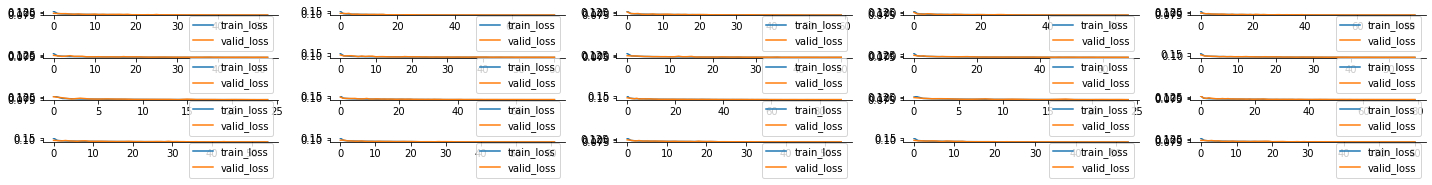

In [31]:
plot_eval_results(scores_nn, cv.n_splits)

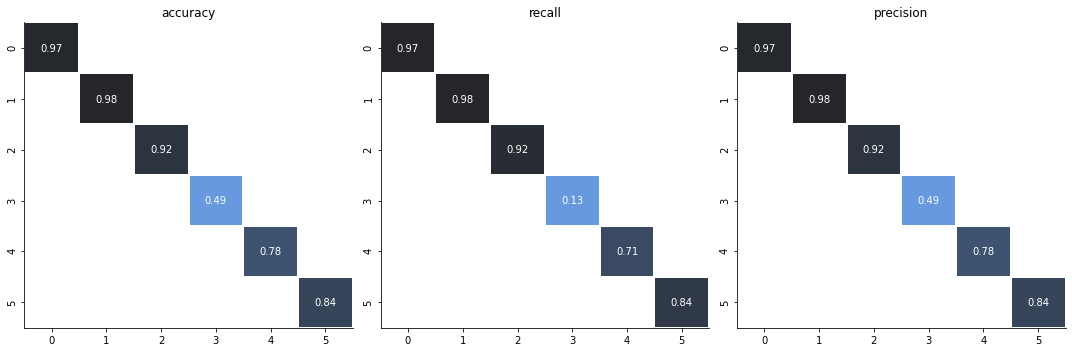

In [32]:
# prepare oof_predictions
oof_y_true = np.array(oof_preds['y_valid'])
oof_y_hat = le.inverse_transform(np.argmax(oof_preds['y_hat'],axis=1))

# create confusion matrix, calculate accuracy, recall & precision
cm = pd.DataFrame(data=confusion_matrix(oof_y_true,oof_y_hat, labels= le.classes_), index=le.classes_,columns=le.classes_)
plot_cm(cm)

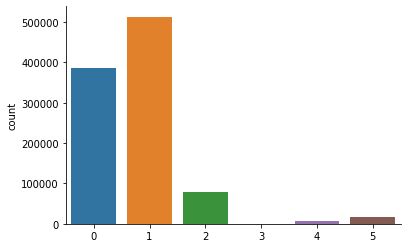

In [33]:
#create final prediction, inverse labels to original classes
final_predictions = le.inverse_transform(np.argmax(sum(predictions), axis=1))

sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['Cover_Type'] = final_predictions
sample_submission.to_csv('submission1.csv', index=False)

sns.countplot(final_predictions)
sns.despine()